In [28]:
# Importing Required libraries and modules:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
# importing final data:

df = pd.read_csv("C:/Users/Yash/Downloads/TTSAP_Final_Data.csv")

In [37]:
df.head()

,Ratings,Message
0,3,I am coming to the borders and I will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [34]:
# Doing Sentiment Intensity Analysis and based on it's score (<>0), categorizing it as Positive or Negative and making a column of it:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

text_psc = []

for i in df["Message"]:
    sc = sn.polarity_scores(i)
    
    if sc['compound'] >= 0:
        psc = "Positive"
    else:
        psc = "Negative"
        
    text_psc.append(psc)

In [35]:
df['Sentiment'] = text_psc

<AxesSubplot:xlabel='Ratings', ylabel='count'>

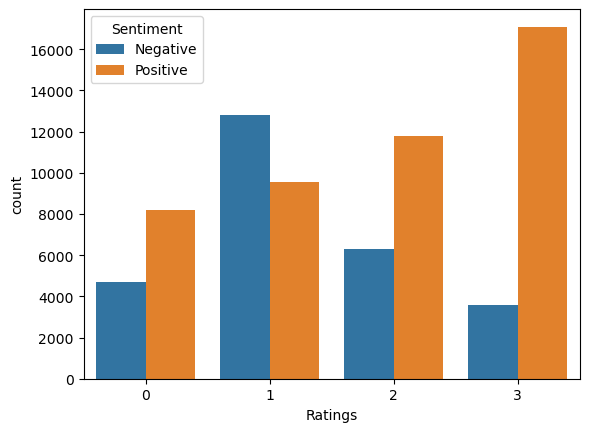

In [15]:
# Analyzing the Sentiments for after Sentiment Intensity Analysis:

sns.countplot(data= df, x = df['Ratings'],hue= "Sentiment")

In [16]:
df.groupby(['Ratings','Sentiment']).size().unstack()

Sentiment,Negative,Positive
Ratings,,
0,4706,8169
1,12810,9548
2,6308,11800
3,3562,17092


In [17]:
# Removing special charcters in Message like (/,.''<) etc:

import re

df["Message"] = df["Message"].apply(lambda x : re.sub(r'[^a-zA-Z0-9\s]', "",x))

In [18]:
# Removing stop words in Message like (I, we, you, they, to) etc:

import nltk
from nltk.corpus import stopwords
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

In [19]:
stopwords = stopwords.words("english")

df["Message"] = df["Message"].apply(lambda x : " ".join(i for i in x.split() if i not in stopwords))

In [20]:
# Splitting the data into training and testing sets:

from sklearn.model_selection import train_test_split

x = df["Message"]
y = df['Ratings']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

In [21]:
# Vectorization (feature extraxtion) of Message columns(X), to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.
# It converts the text in column to numeric:

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

X_train_v = tf.fit_transform(X_train)
X_test_v = tf.transform(X_test)

In [ ]:
# Training the models, finding predictions, checking for accuarcy of the models and finding the best fit model for such prediction:

In [22]:
# Logistic Regression model:

lg = LogisticRegression()

lg.fit(X_train_v, y_train)

Y_pred = lg.predict(X_test_v)

metrics.accuracy_score(y_test, Y_pred)

C:\Users\Yash\anaconda3\anavonda_a\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7632304448889129

In [23]:
print(metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      3174
           1       0.76      0.85      0.80      5584
           2       0.76      0.72      0.74      4594
           3       0.76      0.79      0.77      5147

    accuracy                           0.76     18499
   macro avg       0.77      0.75      0.75     18499
weighted avg       0.76      0.76      0.76     18499



In [ ]:
# Decision Tree model:

In [24]:
dt = DecisionTreeClassifier()

dt.fit(X_train_v, y_train)

Y_pred1 = dt.predict(X_test_v)

metrics.accuracy_score(y_test, Y_pred1)

0.7377696091680631

In [25]:
print(metrics.classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      3174
           1       0.77      0.77      0.77      5584
           2       0.70      0.74      0.72      4594
           3       0.75      0.75      0.75      5147

    accuracy                           0.74     18499
   macro avg       0.73      0.73      0.73     18499
weighted avg       0.74      0.74      0.74     18499



In [ ]:
# Random Forest model:

In [26]:
rf = RandomForestClassifier()

rf.fit(X_train_v, y_train)

Y_pred2 = rf.predict(X_test_v)

metrics.accuracy_score(y_test, Y_pred2)

0.9037785826260879

In [27]:
print(metrics.classification_report(y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3174
           1       0.90      0.93      0.92      5584
           2       0.88      0.90      0.89      4594
           3       0.89      0.92      0.91      5147

    accuracy                           0.90     18499
   macro avg       0.91      0.90      0.90     18499
weighted avg       0.91      0.90      0.90     18499



In [ ]:
# Random Forest model with highest accuracy (90%) is found the best fit model for the purpose.